In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [46]:
# stockof apple
df = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
df = df[['Close']]
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.320427
2015-01-05,23.635290
2015-01-06,23.637514
2015-01-07,23.968960
2015-01-08,24.889906


In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)


In [48]:
train_size = int(len(scaled_data) * 0.80)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# resahpping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [52]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))     
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))
analyser='adam'
model.compile(optimizer=analyser, loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0220
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.8619e-04
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9240e-04
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.6354e-04
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4246e-04
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 3.4557e-04
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.2688e-04
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.0537e-04
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.9469e-04
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0841e-04


In [56]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1,1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
print(f"RMSE: {rmse:.2f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
RMSE: 5.97


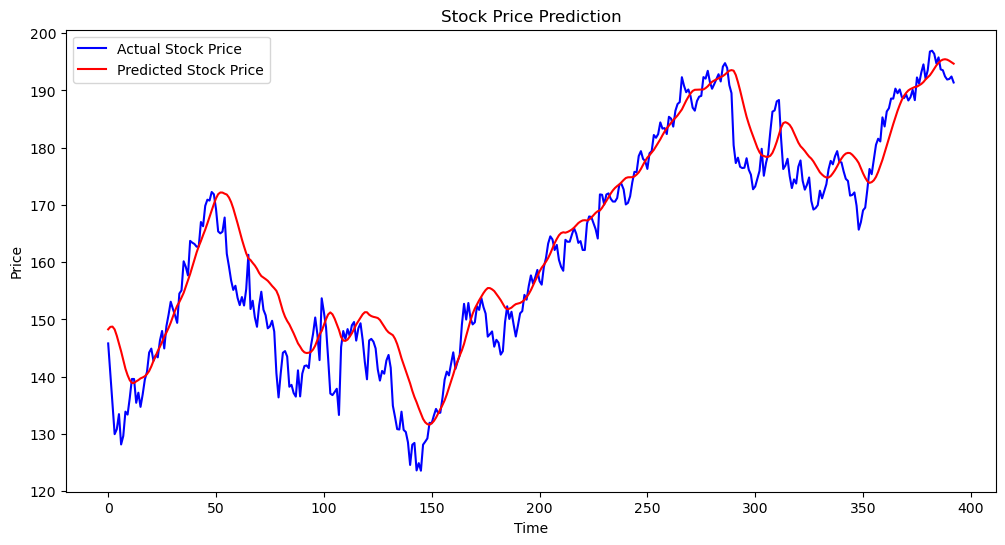

In [58]:
plt.figure(figsize=(12,6))
plt.plot(actual_stock_price, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [32]:
#showing differnece of stock price between Apple.Inc and Microsoft.Inc

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


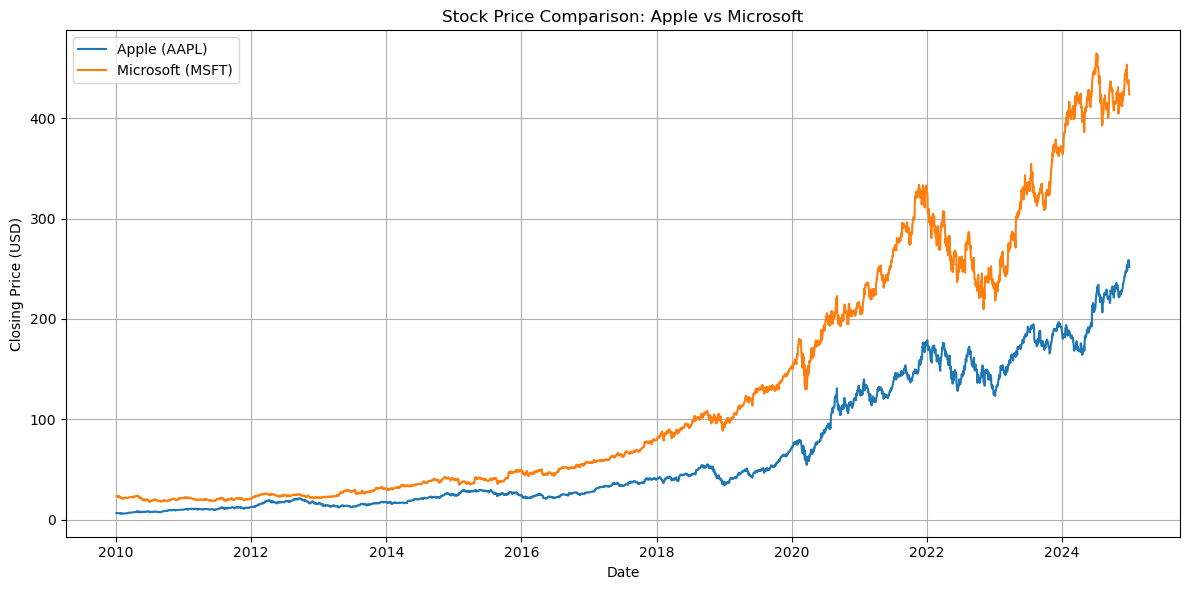

In [50]:
import yfinance as yf
import matplotlib.pyplot as plt

# data for two companies
apple_data = yf.download('AAPL', start='2010-01-01', end='2024-12-31')
microsoft_data = yf.download('MSFT', start='2010-01-01', end='2024-12-31')

# Combine closing prices 
combined_df = apple_data[['Close']].rename(columns={'Close': 'Apple_Close'}).copy()
combined_df['Microsoft_Close'] = microsoft_data['Close']

plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Apple_Close'], label='Apple (AAPL)')
plt.plot(combined_df.index, combined_df['Microsoft_Close'], label='Microsoft (MSFT)')
plt.title('Stock Price Comparison: Apple vs Microsoft')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
